# Regressão Linear (CO2 x Motor)

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [72]:
# Preparando o Dataset - selecionado as colunas que nos interessam
df = pd.read_csv("FuelConsumptionCo2.csv")
motores =  df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]
display(motores)
display(co2)

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


## Separando dados de treino e dados de teste
- Dados separados para Treino (80%) e Teste do modelo (20% dos dados), usando a técnica de **train test split**;

In [82]:
# Separando o Dataset de treino e o Dataset de teste: usando o train_test_split
motores_treino, motores_test, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42);

In [74]:
print(">>> MOTORES: TREINO")
display(motores_treino)
print(">>> MOTORES: TESTE")
display(motores_test)
print(">>> CO2: TREINO")
display(co2_treino)
print(">>> CO2: TESTE")
display(co2_teste)

>>> MOTORES: TREINO


,ENGINESIZE
333,1.4
106,4.4
585,3.0
55,3.0
213,5.3
...,...
330,3.6
466,2.4
121,4.4
1044,1.8


>>> MOTORES: TESTE


,ENGINESIZE
732,4.7
657,3.5
168,3.6
86,3.0
411,2.0
...,...
963,2.0
294,2.4
275,2.4
903,3.0


>>> CO2: TREINO


,CO2EMISSIONS
333,179
106,292
585,267
55,262
213,380
...,...
330,276
466,230
121,317
1044,198


>>> CO2: TESTE


,CO2EMISSIONS
732,304
657,221
168,294
86,221
411,207
...,...
963,212
294,230
275,232
903,260


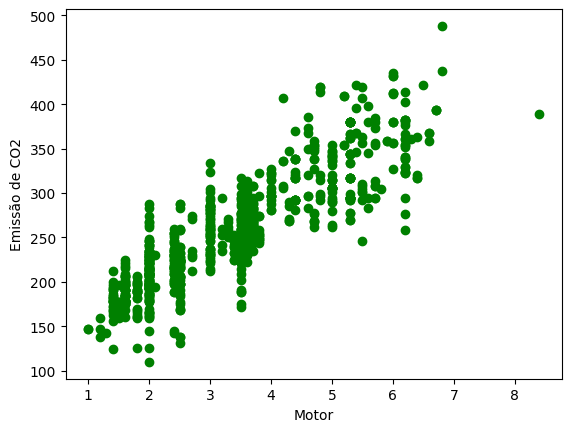

In [75]:
# Plotar a correlação entre as features do dataset de treinamento - scatter: dispersão
plt.scatter(motores_treino, co2_treino, color='green')
plt.xlabel("Motor")
plt.ylabel("Emissão de CO2")
plt.show()

## Etapa 1: Treino

In [76]:
# MODELO - REGRESSÃO LINEAR
modelo =  linear_model.LinearRegression()

In [77]:
# .fit = treinar o modelo usando o dataset de TREINO

# f(x) = A.X +  B
# A = inclinação da reta (coeficiente) | B = intercepto
# f(x) = 38.88.X + 126

modelo.fit(motores_treino, co2_treino)
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


A equação que o modelo está usando é:

$
  CO2=126.29+38.99×(motor)
$

- Representa o valor da variável dependente (no seu caso, o CO2) quando a variável independente (motores) é igual a 0.

- CO2(motor) = valor de CO2 | f(x) 

- O **coeficiente** ser **39.99** significa que, para cada aumento de 1 unidade no tamanho do motor, as emissões de CO2 aumentam em 39.99 unidades.


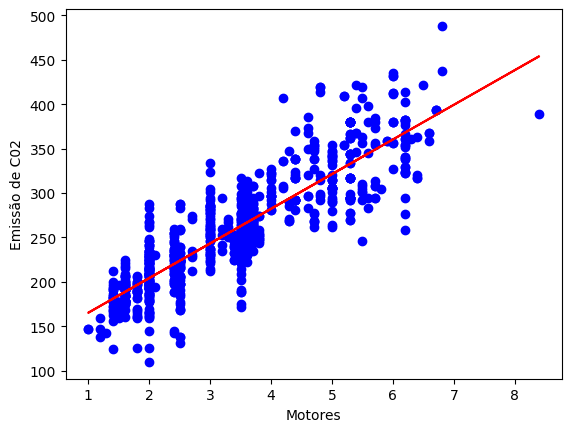

In [78]:
# Plotando a reta de regressão usando o Dataset de TREINO
plt.scatter(motores_treino, co2_treino, color='blue')
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

## Etapa 2 : Teste

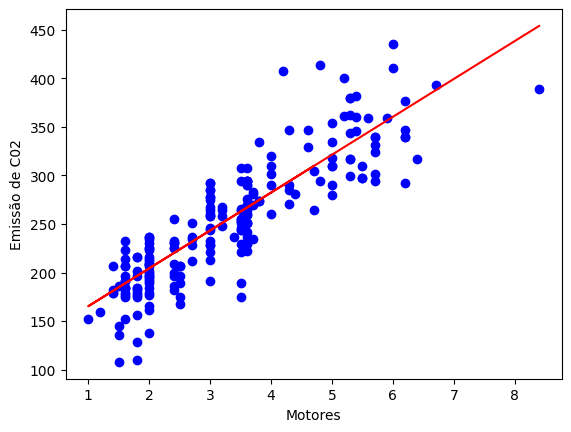

In [85]:
# EXECUTANDO O MODELO NO DATASET DE TESTE
# 1. Fazendo as predições usando o modelo e base de teste
predCO2 = modelo.predict(motores_test)

# Plotando a reta de regressão - dataset de TESTE
plt.scatter(motores_test, co2_teste, color='blue')
plt.plot(motores_test, modelo.coef_[0][0]*motores_test + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02") 
plt.xlabel("Motores")
plt.show()

In [83]:
# prevendo novo valor de motor
# a função predict() espera receber uma matriz de dados
enginesize = 3.5

def predict_co2(enginesize):
  matriz_novo_motor = pd.DataFrame([[enginesize]], columns=motores_treino.columns)  
  return modelo.predict(matriz_novo_motor)

print("Motor ", enginesize, " - ", predict_co2(enginesize)[0][0].round(2), "CO2")

Motor  3.5  -  262.77 CO2


## Etapa 3: Avaliação do Modelo

In [91]:
# Avaliando o Modelo
print("Soma dos Erros ao Quadrado (SSE): %.2f " % np.sum((predCO2 - co2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predCO2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predCO2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predCO2)))
print("R2-score: %.2f" % r2_score(predCO2, co2_teste))

Soma dos Erros ao Quadrado (SSE): 210990.77 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68


/home/avila/cs/workspace/py/machine-learning/Linear Regression/FuelConsumptionCO2/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_19074/1116936984.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Soma dos Erros ao Quadrado (SSE): %.2f " % np.sum((predCO2 - co2_teste)**2))
